# Vodafone Customer churn prediction

#### **Business Undestanding**

##### **Problem statements**:

Vodafone is currently facing a substantial challenge with customer churn, which negatively impacts its revenue and operational efficiency. The existing approaches to manage churn are predominantly reactive and lack the precision to effectively identify customers at risk of leaving. This inability to predict churn accurately hinders Vodafone's efforts to implement timely and effective retention strategies, resulting in increased costs associated with acquiring new customers and managing churn.

##### **Project Goal and Objectives**:

**Goal:**
Develop a robust machine learning model to accurately predict customer churn at Vodafone, enabling the company to implement preemptive retention strategies and reduce the overall churn rate.

**Objectives:**

1. **Data Analysis:** Conduct a thorough analysis of customer data to identify patterns and factors contributing to churn, including demographics, usage patterns, service quality, and customer support interactions.
2. **Feature Engineering:** Create meaningful features from raw data to improve the predictive power of the churn model.
3. **Model Development:** Build and evaluate various machine learning models to predict customer churn, selecting the best-performing model based on accuracy, precision, recall, and other relevant metrics.
4. **Model Evaluation:** Rigorously assess the performance of the models using appropriate validation techniques and metrics to ensure robustness and reliability.
5. **Actionable Insights:** Provide actionable insights and recommendations based on the model’s predictions to help Vodafone develop targeted retention campaigns and improve customer satisfaction.

##### **Stakeholder**

1. **Customer Retention Team**:
   **Role**: Implement retention strategies based on the model's predictions.

2. **Marketing Team**:
   **Role**: Develop and execute marketing strategies to enhance customer loyalty.
3. **Customer Service Team**:
   **Role**: Address customer concerns and improve service quality.
4. **Data Science and Analytics Team**:
   **Role**: Develop, refine, and validate the churn prediction model.
5. **Vodafone Senior Management**:
   **Role**: Make strategic decisions based on model insights.

These stakeholders will actively use the model to drive decisions and actions that enhance customer retention and loyalty, ultimately contributing to Vodafone's overall business success.

##### **Key Metrics and Success Criteria**

1. **Accuracy**: Proportion of correct predictions.
   **Target**: ≥ 85% (Balanced data)

2. **F1 Score**:
   **Definition**: Harmonic mean of precision and recall.
   **Target**: ≥ 80%.

3. **AUC-ROC**: Discriminative power of the model.
   **Target**: ≥ 0.80.

4. At least 4 baseline models
5. All hyperparameter uning should be only to basedline model if they excedd there F1 score

##### **Features**

There are 17 categorical features:

- CustomerID : Unique identifier for each customer.
- Gender : Gender of the customer (Male, Female).
- SeniorCitizen : Indicates if the customer is a senior citizen (1: Yes, 0: No).
- Partner : Indicates if the customer has a partner (Yes, No).
- Dependents : Indicates if the customer has dependents (Yes, No).
- PhoneService : Indicates if the customer has a phone service (Yes, No).
- MultipleLines : Indicates if the customer has multiple lines (Yes, No, No phone service).
- InternetService : Type of internet service the customer has (DSL, Fiber optic, No).
- OnlineSecurity : Indicates if the customer has online security service (Yes, No, No internet service).
- OnlineBackup : Indicates if the customer has an online backup service (Yes, No, No internet service).
- DeviceProtection : Indicates if the customer has device protection service (Yes, No, No internet service).
- TechSupport : Indicates if the customer has tech support service (Yes, No, No internet service).
- StreamingTV : Indicates if the customer streams TV (Yes, No, No internet service).
- StreamingMovies : Indicates if the customer streams movies (Yes, No, No internet service).
- Contract : The contract term of the customer (Month-to-month, One year, Two years).
- PaperlessBilling: Indicates if the customer uses paperless billing (True, False).
- PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

Next, there are 3 numerical features:

- Tenure: Number of months the customer has stayed with the company
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer

Finally, there’s a prediction feature:

- Churn: Whether the customer churned or not (Yes or No)

##### **Hypotheses**

**Hypothesis 1: Contract Type**
The type of contract a customer has is a strong indicator of their commitment to the service. Customers on month-to-month contracts might be more prone to churn compared to those with longer-term contracts.

**Null Hypothesis (H0):**
The contract term (Month-to-month, One year, Two years) has no effect on the likelihood of customer churn.

**Alternative Hypothesis (H1):**
The contract term (Month-to-month, One year, Two years) has a significant effect on the likelihood of customer churn.

**Hypothesis 2: Monthly Charges**
Higher monthly charges might lead to dissatisfaction among customers, especially if they do not perceive a corresponding value in the service, leading to higher churn rates.

**Null Hypothesis (H0):**
Monthly charges have no effect on the likelihood of customer churn.

**Alternative Hypothesis (H1):**
Monthly charges have a significant effect on the likelihood of customer churn.

**Hypothesis 3: Internet Service**
The type of internet service can impact customer satisfaction. For example, customers using fiber optic might be less likely to churn due to higher satisfaction with faster internet speeds compared to DSL or no internet service.

**Null Hypothesis (H0):**
The type of internet service (DSL, Fiber optic, No) has no effect on the likelihood of customer churn.

**Alternative Hypothesis (H1):**
The type of internet service (DSL, Fiber optic, No) has a significant effect on the likelihood of customer churn.

#### Analtytics Questions

1. Overall Churn Rate:

   What is the overall churn rate in the dataset?

2. Contract Type and Churn:

   What is the distribution of contract types among customers?
   How does the contract type affect the churn rate?

3. Tenure and Churn:

4. What is the distribution of tenure among customers?
   How does tenure affect the churn rate?
5. Monthly Charges and Churn:

   What is the distribution of monthly charges among customers?
   How do monthly charges affect the churn rate?

6. Payment Method and Churn:

   What are the different payment methods used by customers?
   How does the payment method affect the churn rate?

7. Internet Service and Churn:

   What types of internet services are customers using?
   How does the type of internet service affect the churn rate?

Additional Services and Churn (Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies):

How does the usage of these additional services affect the churn rate?
Senior Citizens and Churn:

What percentage of customers are senior citizens?
How does the churn rate compare between senior citizens and non-senior citizens?
Partners and Churn:

How many customers have partners?
Is there a significant difference in churn rates between customers with and without partners?
Dependents and Churn:

How many customers have dependents?
How does the presence of dependents affect the churn rate?


### Data Undestanding


#### Data Importation


In [56]:
# data manipulation packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dattabase conection packages
import pyodbc  
from sqlalchemy import create_engine    
from dotenv import dotenv_values

import warnings
warnings.filterwarnings('ignore')

In [57]:
# pip install pyodbc, python-dotenv

#### load datasets


In [58]:
# database data
environment_variables = dotenv_values('..\.env')

server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [59]:
connection = pyodbc.connect(connection_string)

In [60]:
# SQL query to fetch data from 'dbo.LP2_Telco_churn_first_3000' table
query = "Select * from dbo.LP2_Telco_churn_first_3000"

# Read data from the SQL query result
LP2_Telco_churn_first_3000 = pd.read_sql(query, connection)
LP2_Telco_churn_first_3000.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1864,7105-MXJLL,Female,True,True,False,26,True,False,DSL,False,...,True,False,False,True,One year,False,Mailed check,60.700001,1597.400024,False
2761,2408-WITXK,Female,True,False,False,10,False,None,DSL,False,...,False,False,False,True,Month-to-month,True,Electronic check,34.700001,329.799988,True
2482,9588-OZDMQ,Female,False,True,False,2,True,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,45.000000,89.750000,False
593,0215-BQKGS,Male,False,False,False,30,True,False,Fiber optic,True,...,True,False,False,False,Month-to-month,True,Credit card (automatic),84.300003,2438.600098,False
2546,7175-NTIXE,Female,False,False,False,25,True,False,DSL,True,...,False,True,True,True,Month-to-month,True,Credit card (automatic),76.150002,1992.949951,False


In [61]:
# importing the second dataset
LP2_Telco_churn_second = pd.read_csv('..\data\LP2_Telco-churn-second-2000.csv')
LP2_Telco_churn_second.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


#### Exploratory data analysis(EDA)


In [62]:
# Concatenate the first and second dataset
df = pd.concat([LP2_Telco_churn_first_3000, LP2_Telco_churn_second], ignore_index=True)

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [63]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3797,1169-WCVAK,Male,0,Yes,No,19,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),88.800000,1672.35,No
2071,3392-EHMNK,Female,0,True,True,67,True,True,Fiber optic,False,...,False,True,True,False,Two year,False,Credit card (automatic),94.099998,6302.799805,False
1731,8375-DKEBR,Female,1,False,False,1,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,69.599998,69.599998,True
2289,4056-QHXHZ,Female,0,True,True,72,True,True,Fiber optic,True,...,True,True,True,True,Two year,False,Mailed check,107.449997,7576.700195,False
1285,9134-CEQMF,Male,1,True,False,7,True,False,Fiber optic,False,...,False,False,True,True,Month-to-month,True,Electronic check,89.500000,676.700012,True
3986,5271-DBYSJ,Male,1,No,No,11,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),79.150000,827.7,No
3745,3580-GICBM,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.200000,1445.2,No
4542,3315-TOTBP,Male,0,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,76.000000,1130.85,Yes
3029,1848-LBZHY,Female,0,Yes,No,7,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.300000,355.1,No
2972,9443-JUBUO,Male,0,True,True,72,False,None,DSL,True,...,True,True,True,True,Two year,True,Credit card (automatic),65.250000,4478.850098,False


- data quality Assessment and Exploratory


In [64]:
# info, duplicates, null values and describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [65]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [68]:
df.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


- Key insights

0. Customer ID has no relevant data, need tobe dropped
1. Total Records: The dataset contains a total of 5043 entries.
2. Columns with Missing Values: MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies
   TotalCharges has 5 missing values.
   Churn has 1 missing value.
3. Data Types:Most columns are of type object, indicating categorical data.
   SeniorCitizen and tenure are int64 (integer).
   MonthlyCharges is float64 (floating point).
   TotalCharges is currently of type object, but should be float.
   Churn is object but should be converted to numerical (e.g., 0 and 1)
4. NO duplicated found
5. Uniques values in categorical columns needs to be fixed


In [69]:
def check_unique_values(data):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique value(s):")
        print(unique_values)
        print("\n" + "-"*50 + "\n")
check_unique_values(df)

Column 'customerID' has 5043 unique value(s):
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

--------------------------------------------------

Column 'gender' has 2 unique value(s):
['Female' 'Male']

--------------------------------------------------

Column 'SeniorCitizen' has 2 unique value(s):
[0 1]

--------------------------------------------------

Column 'Partner' has 4 unique value(s):
[True False 'No' 'Yes']

--------------------------------------------------

Column 'Dependents' has 4 unique value(s):
[False True 'No' 'Yes']

--------------------------------------------------

Column 'tenure' has 73 unique value(s):
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

--------------------------------------------------

Column 'PhoneService' has 4 unique value(s):
[F

Certainly! Here’s the rephrased version:

**Identified Issues:**

- Many columns contain synonymous values (e.g., the `Partner` column has both 'False' and 'No' to represent the same concept).
- The values in the `MonthlyCharges` and `TotalCharges` columns should have a consistent number of decimal places.
- The `TotalCharges` column should be converted to the float data type.


### Data Preparation


#### Data Cleaning


- Data unifomity


In [70]:
#Converting to numric data type
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"].dtype

dtype('float64')

In [71]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['SeniorCitizen'].dtype

dtype('O')

In [72]:
# Selecting numeric and categorical columns
df = df.drop('customerID', axis=1)
numeric_cols = df.select_dtypes('number').columns
categorical_cols = df.select_dtypes('object').columns

#Formatting numeric columns to 2 decimal places
df[numeric_cols]= df[numeric_cols].round(2)

- categorical columns


In [73]:
#  a function to convert binary values to 'Yes'/'No'
def convert_to_boolean(df, column):

    # Define a nested function to convert individual values
    def convert_value(value): 
        if value == True  or value == 1 :
            return "Yes"
        elif value == False or value == 0:
            return "No"
        else:
            return value
    df[column] = df[column].apply(convert_value)
    return df


# Invoke function to convet for all columns in data
for col in categorical_cols:
    df = convert_to_boolean(df, col)

**Cleaning the Tenure Column**

- Upon inspection, some rows in the `Tenure` column have a value of 0. These same rows also have `Churn` marked as False and missing `TotalCharges` values. Since `TotalCharges` is calculated as the product of `Tenure` and `MonthlyCharges`, it is unusual for customers with a tenure of 0 months to not have churned. Given this inconsistency, we will delete these rows to ensure data accuracy.


In [74]:
# Inspecting the `tenure` column
df[df["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,None,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,None,None,None,None,None,None,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,None,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
4670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4754,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


- handle NAN values with Median() with in tenure and totalcharges columns


In [75]:
# Replace NaN with the median
df['tenure'] = df[['tenure']].applymap(lambda x: df['tenure'].median() if pd.isnull(x) else x)

In [76]:
df['TotalCharges'] = df[['TotalCharges']].applymap(lambda x: df['TotalCharges'].median() if pd.isnull(x) else x)

Handle missing values


In [77]:
#Checking missing valuesdf.isnull().sum()   
df.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 1
dtype: int64

**key Insights :**

- Since `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, and `MultipleLines` are categorical columns, instead of dropping these columns or imputing missing values with the mode, we will replace them with 'No internet service' or 'No phone service' as appropriate. This approach is based on the assumption that if an entry for a 'No' or 'Yes' question is missing, it likely indicates that the customer does not have that particular service. This assumption is reasonable and practical.

- The row with the missing `Churn` value will be dropped.


In [78]:
# fill the null categorical values with 'False'
cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace NaN with 'No internet service' 
df[cols_to_replace] = df[cols_to_replace].applymap(lambda x: 'No internet service' if pd.isnull(x) else x)

# Replace NaN with 'No phone service' in the MultipleLines 
df['MultipleLines'] = df[['MultipleLines']].applymap(lambda x: 'No phone service' if pd.isnull(x) else x)

#Dropping the missing value churn 
df=df.dropna(axis=0,subset=["Churn"])

In [79]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5042 non-null   object 
 1   SeniorCitizen     5042 non-null   object 
 2   Partner           5042 non-null   object 
 3   Dependents        5042 non-null   object 
 4   tenure            5042 non-null   int64  
 5   PhoneService      5042 non-null   object 
 6   MultipleLines     5042 non-null   object 
 7   InternetService   5042 non-null   object 
 8   OnlineSecurity    5042 non-null   object 
 9   OnlineBackup      5042 non-null   object 
 10  DeviceProtection  5042 non-null   object 
 11  TechSupport       5042 non-null   object 
 12  StreamingTV       5042 non-null   object 
 13  StreamingMovies   5042 non-null   object 
 14  Contract          5042 non-null   object 
 15  PaperlessBilling  5042 non-null   object 
 16  PaymentMethod     5042 non-null   object 
 17  

In [82]:
# save the cleaned data 
# df.to_csv('..\data\dfCleaned.csv',index=False)


- Detect outliers only for the numerical columns


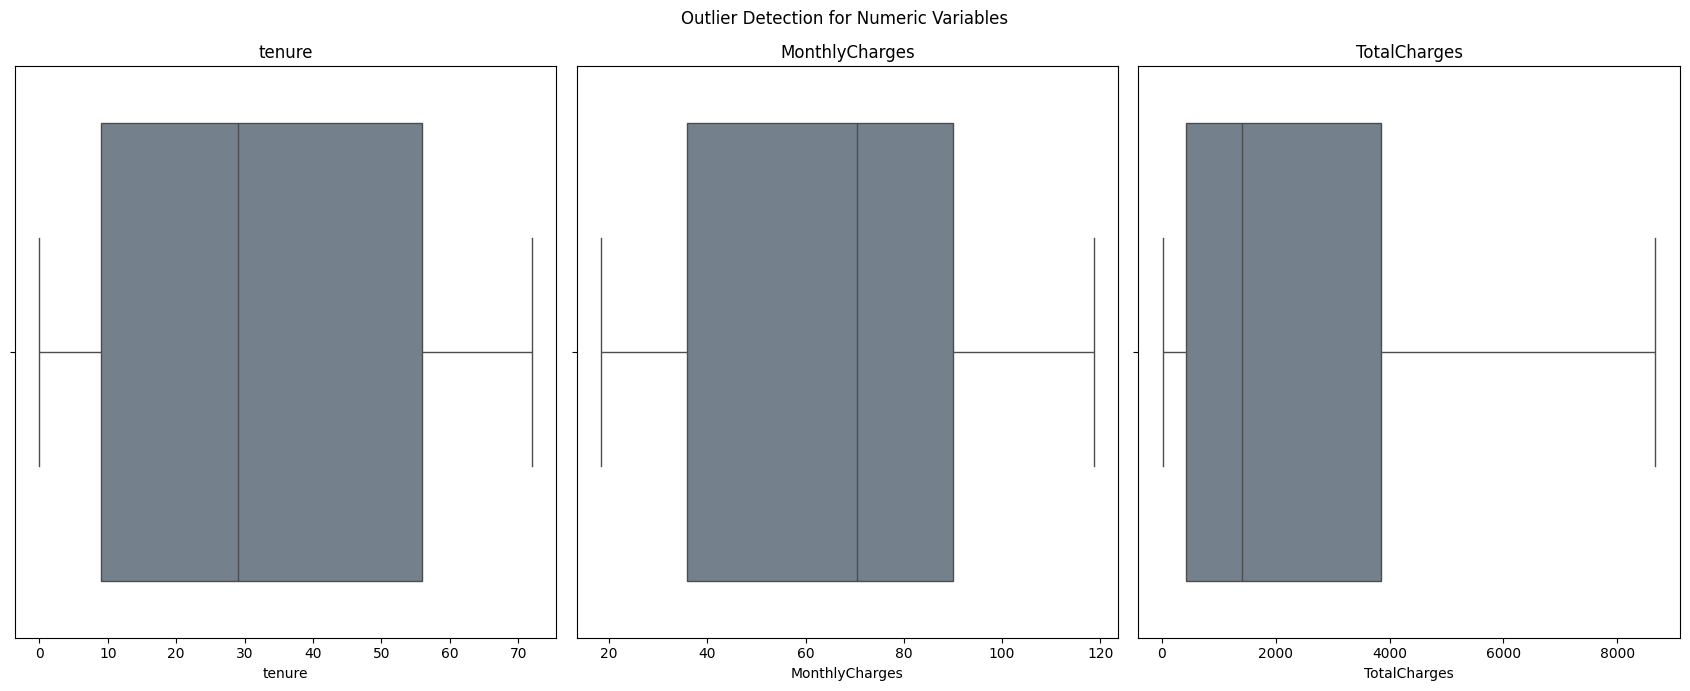

In [99]:
fig, axes = plt.subplots(ncols=len(numeric_cols), figsize=(17, 7), )

# Loop through numeric columns 
for i, col in enumerate(numeric_cols):
    if df[col].dtype in ['int64', 'float64']:  # column is numeric
        sns.boxplot(x=df[col], ax=axes[i], color='slategrey')
        axes[i].set_title(col)
    else:
        axes[i].axis('off')  # exlude non-numeric columns
        print(f"Column '{col}' is not numeric and will not be plotted.")


title = fig.suptitle('Outlier Detection for Numeric Variables')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Observations from Outlier Analysis**

- Our numerical columns are within the expected range, with no outliers detected.
- However, `TotalCharges` and `MonthlyCharges` exhibit skewness.

  `TotalCharges` is positively skewed, with a tail extending towards larger values (up to 4000). Consequently, the mean is greater than the median, which in turn is greater than the mode.

  `MonthlyCharges` is negatively skewed, with a tail extending towards smaller values (around 40). This indicates that the mean is less than the median, which is also less than the mode.

- The `tenure` column approximates a normal distribution.


### Univariate analysis


**EDA of Numeric Variables**


In [84]:
df[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,5042.000000,5042.000000,5042.000000
mean,32.568822,65.081376,2299.527063
std,24.525954,30.064564,2266.828751
min,0.000000,18.400000,18.800000
25%,9.000000,35.762500,417.875000
50%,29.000000,70.550000,1401.150000
75%,56.000000,90.050000,3857.012500
max,72.000000,118.650000,8670.100000


- key insights

**Tenure**: The customer tenure data is fairly spread out, with many customers having relatively short to moderate tenures, and a few long-term customers.

**Monthly Charges**: The monthly charges are widely spread with a concentration of lower values, indicating a negatively skewed distribution.

**Total Charges**: The total charges show a wide range and a positively skewed distribution, with higher values extending towards the maximum observed total charge.


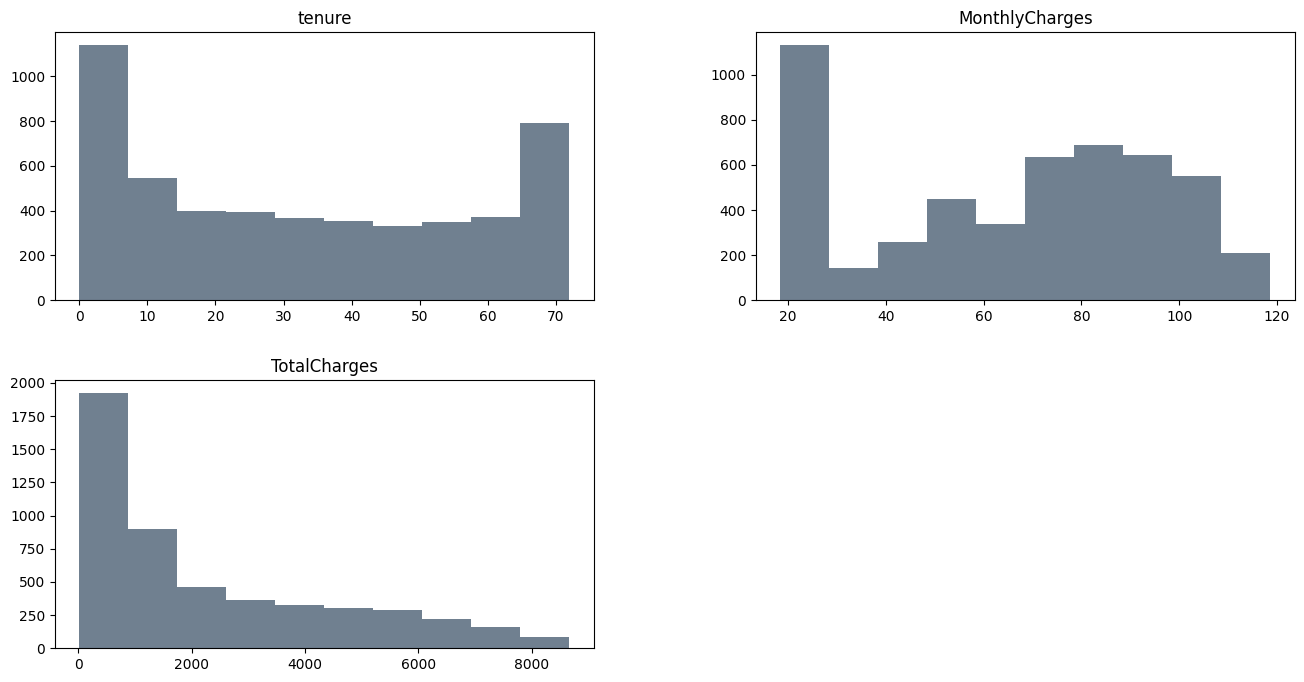

In [103]:
# 'Distribution of  Numerical features'
df.hist(figsize=(16,8), grid=False, color='slategrey')
plt.show()

### Key Notes from Distribution of Numerical Features

1. **Tenure Distribution:**

   - High concentration of customers less than 5 months tenure.
   - Uniform distribution for tenures between 10 and 60 months.
   - Peak at the maximum tenure of 72 months.

2. **Monthly Charges Distribution:**

   - High concentration of customers with low monthly charges around $20.
   - Even distribution between $40 and $100.
   - Noticeable drop-off after $100.

3. **Total Charges Distribution:**
   - High concentration of customers with low total charges.
   - Positively skewed with a long tail.


**EDA of categorical Variables**


In [104]:
# distribution

df[categorical_cols].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,2558,4223,2585,3481,4553,2424,2247,2507,2231,2219,2471,2018,1981,2744,2995,1699,3706


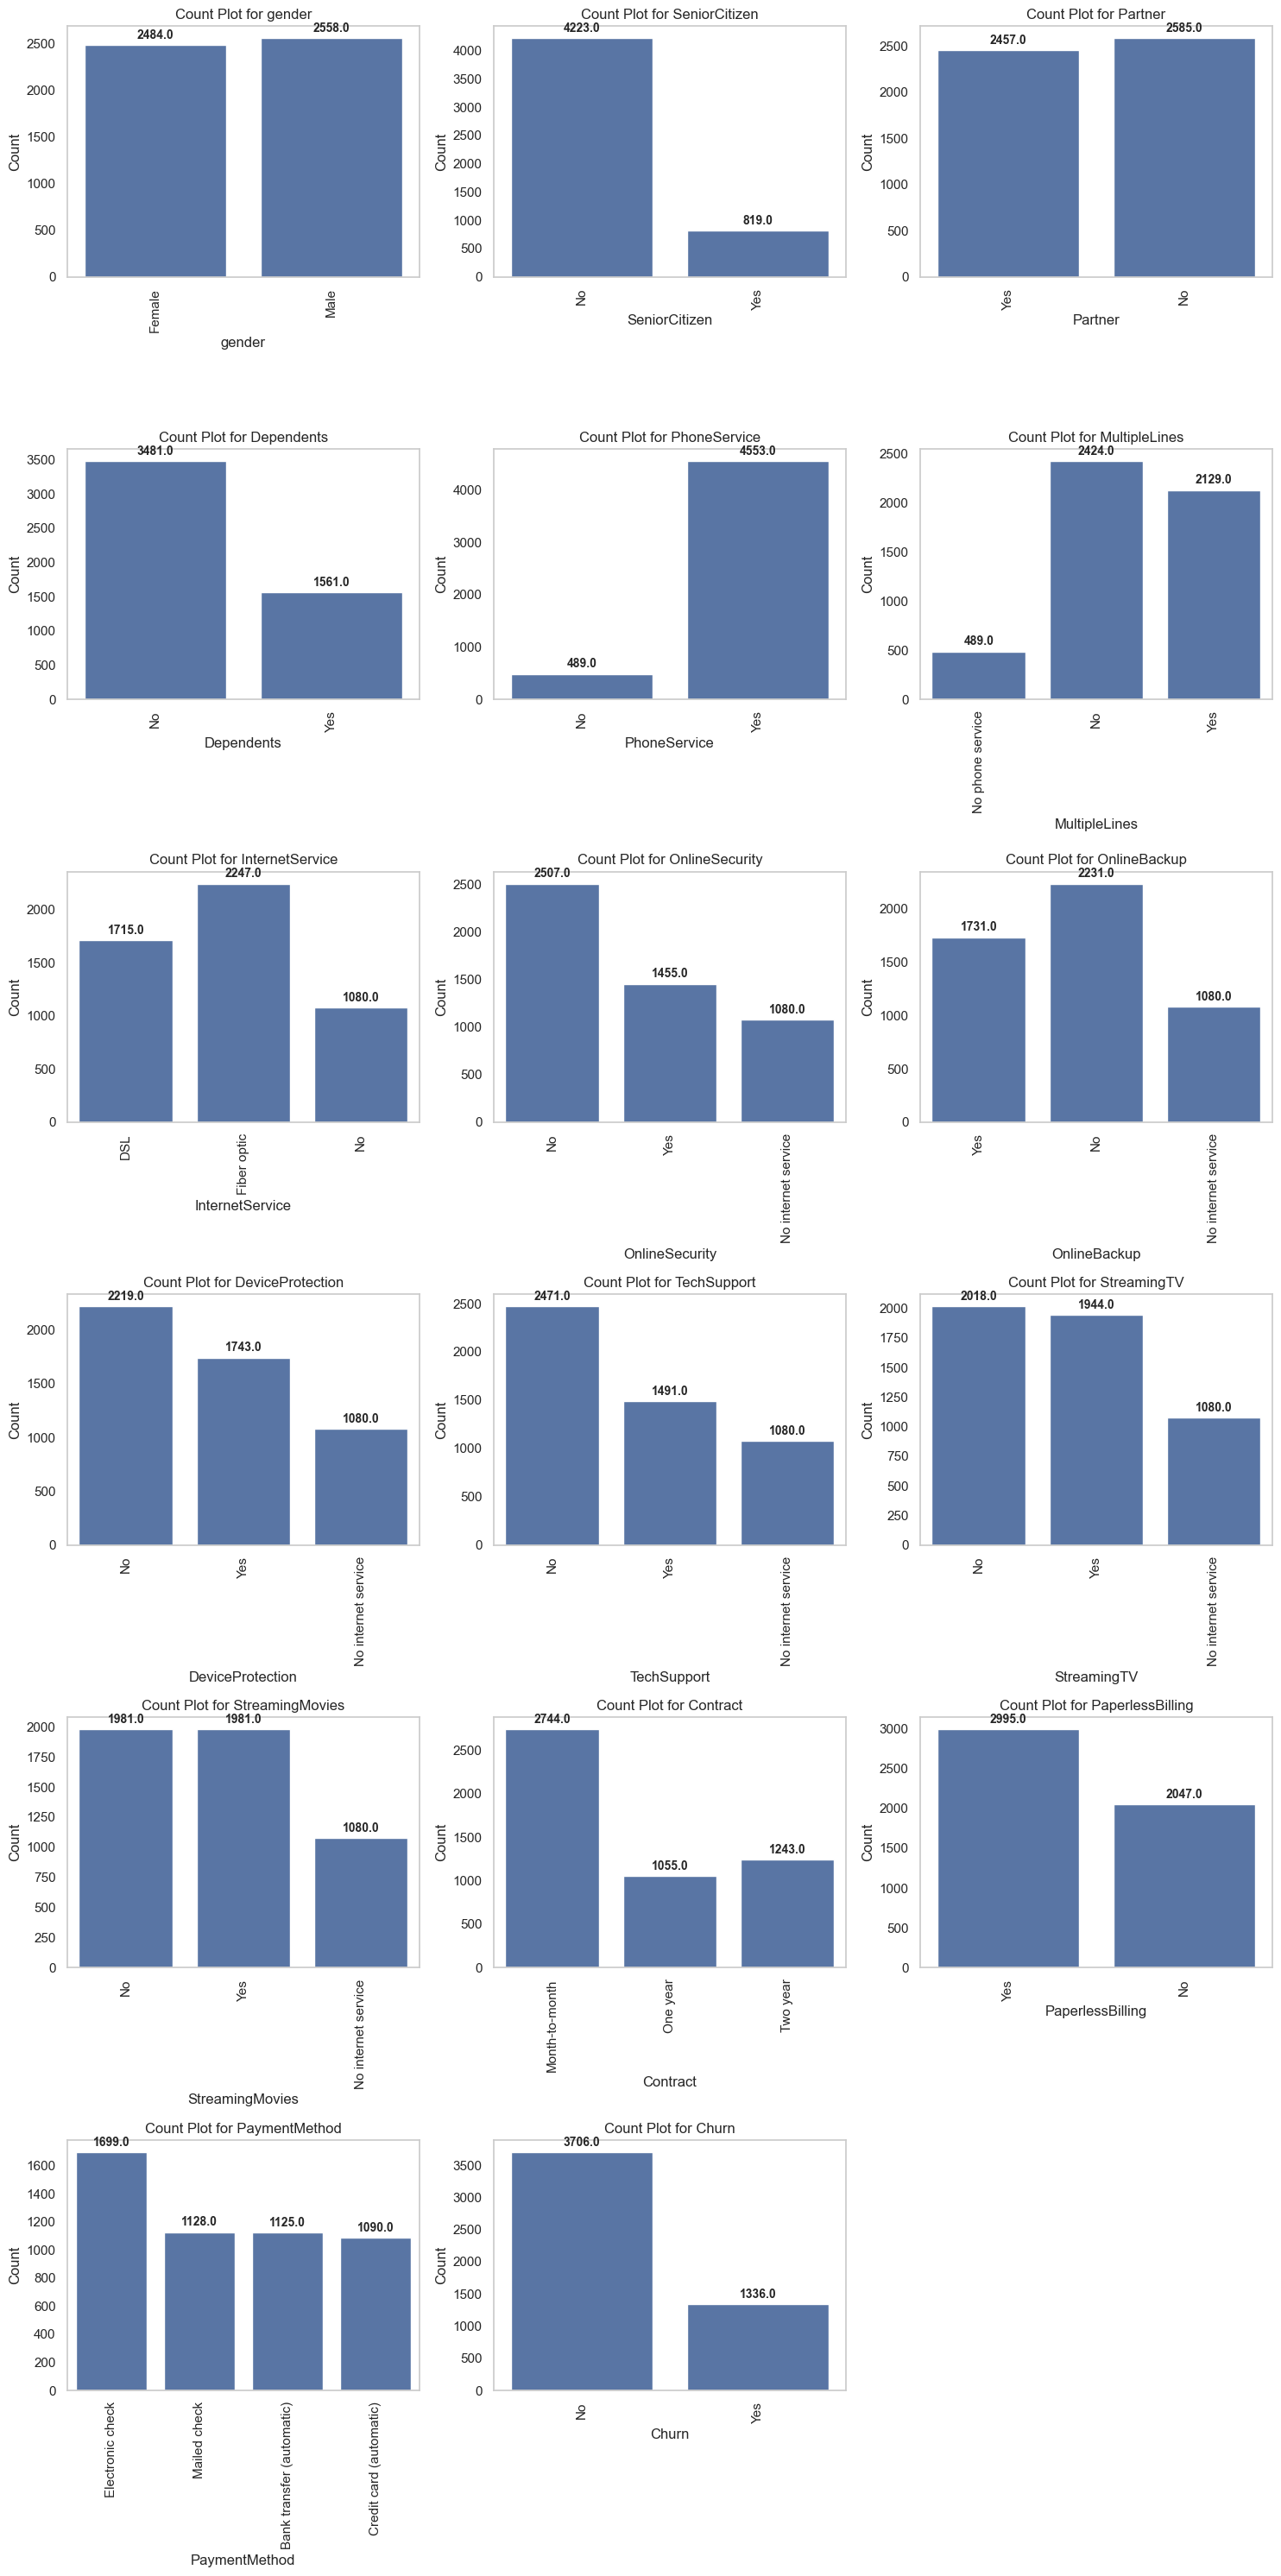

In [112]:

num_cols = 3
num_rows = (len(categorical_cols) - 1) // num_cols + 1


sns.set(style="whitegrid")
plt.figure(figsize=(5 * num_cols, 5 * num_rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(x=col, data=df[categorical_cols])
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=90)

    #  values 
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  #vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.grid(False)

plt.tight_layout()  # subplot spacing
plt.show()

1. **Gender:**

   - Gender indicates whether customers are male or female.
   - Males account for 51% of the customers, outnumbering females.

2. **Senior Citizen:**

   - The majority of customers are not senior citizens.
   - Only 819 out of 5042 customers (about 16%) are senior citizens.

3. **Partner:**

   - Customers without partners slightly outnumber those with partners.
   - The difference is just 128 customers.

4. **Dependents:**

   - Indicates whether a customer has dependents.
   - 3481 customers have no dependents, making up the majority.

5. **Phone Service:**

   - Indicates whether a customer has subscribed to phone service.
   - 4553 customers, representing 90%, have subscribed to phone service.

6. **Multiple Lines:**

   - Indicates whether a customer has multiple lines.
   - 2693 customers did not have multiple lines, outweighing the other options.

7. **Internet Service:**

   - Pertains to whether a customer opted for DSL, fiber optic, or no internet service.
   - 2247 customers subscribed to fiber optic, making it the most popular option.

8. **Online Security:**

   - Indicates whether a customer adopted the online security service.
   - 3158 customers did not subscribe to online security.

9. **Online Backup:**
   - Indicates whether a customer subscribed to online backup.
   - 2882 out of 5042 customers did not subscribe to online backup.


- probability of churning


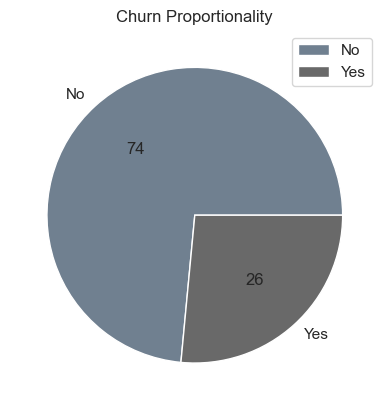

In [120]:
colors=['slategrey', 'dimgrey']
plt.pie(df.Churn.value_counts(), colors=colors,
        labels= ['No', 'Yes'],
        autopct='%.f', normalize=True)
plt.title('Churn Proportionality')
plt.legend()
plt.show()

**Conclusion on the Churn rate**

- There are 3706 customers that remained in the company which is 74% of the customers while 1334 (26% of the customers) churned meaning the retention rate is higher than the churn rate.
- There is also a class imbalance in the target variable as there is unequal distribution of classes in the dataset. This issue will later be addressed as the machine learning classifier tends to be more biased towards the majority class, causing bad classification of the minority class


- Bi-variate


- Multi-variable analysis


#### key insights


### Modeling and Evaluation


### Deployment

Not Applicable
